In [10]:
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives.asymmetric import padding
from cryptography.hazmat.primitives import hashes

def generate_rsa_keys():
    private_key = rsa.generate_private_key(
        public_exponent=65537, # Стандартное значение для генерации ключей RSA
        key_size=2048 # Размер ключа в битах
    )

    public_key = private_key.public_key()
    return private_key, public_key

def encrypt_message(public_key, message):
    ciphertext = public_key.encrypt(
        message.encode(),  # Преобразуем строку в байты
        padding.OAEP(      # Применение паддинга OAEP для безопасности
            mgf=padding.MGF1(algorithm=hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None
        )
    )
    return ciphertext

def decrypt_message(private_key, ciphertext):
    original_message = private_key.decrypt(
        ciphertext,
        padding.OAEP(      # Тот же паддинг
            mgf=padding.MGF1(algorithm=hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None
        )
    )
    return original_message.decode()  # Преобразуем байты обратно в строку

if __name__ == "__main__":
    private_key, public_key = generate_rsa_keys()

    message = "Сообщение для шифровки!"

    print("Оригинальное сообщение:", message)
    ciphertext = encrypt_message(public_key, message)
    print("Зашифрованное сообщение:", ciphertext)

    decrypted_message = decrypt_message(private_key, ciphertext)
    print("Расшифрованное сообщение:", decrypted_message)


Оригинальное сообщение: Сообщение для шифровки!
Зашифрованное сообщение: b"\xbb2\x90\xc2\xc0\x02'\xf9\x08\xbc\xc5`\x9d\xf0\xee\xa8\xcc~\xd2\xe4Q\xa0\x8a\x93\xa6\x0cW\xa56\x80\xca\x14i\xf5\x19|\xc8\xb4V7\xe8\xa6\xa3evU\x1d*\xc0\xb0\xa0\xe2<L1\xb7\xe8\xeb9\xae\xfe\x94\xf7\x100\xcd\xa5\xb9\x96\xf1\xb1\xa6\xc2W\x80\xac9\xc1\x8f\x16,p\xd4\x03~P\x8b\x08\x05\xa2$\x93^\xb9\x7f\xe7\x01\xd9N\xec7\xfbo`\xfcL\x1cD\xff\xe6\x99E\x04\xa0\xb57\x1a=\xe0\xcc*\xc63_M\xa6J\xf2z\x1c\x9bL\xd6\x1ch\x94\xc2{\x0ffk\xec\x9bW\xa2\n|\xe8\x8b\\\xd9\xfe\xddo\x8e\xc1\xc3M\xfc\xc2\x9eWE\x98\xf5\x88\xcc\xbbW]\xe5\xea\xb2\xd0\xbd\xb6\xaa\xbf3N\xc5\xd4hn.\xa5\x0e\x0e\xad\x04\xb6Kp\xb9!c\xb8\x83u\xe6\x98\xb9V\xc8\xaf\xf0\xd1\xa3\x12HA\xd6Q 5\xa0zs\xad\xa2\xd7\x8b\xa9X\xe2\xa7\x121~\xb5\xbd\x05^@\xd0\xbea\xfe\xe7 \x16\x82\xf9\xa5\xddl\xc9@\xe0\xc5\x10\x9aTf\xaf\xdb"
Расшифрованное сообщение: Сообщение для шифровки!


In [8]:
import time
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives.asymmetric import padding
from cryptography.hazmat.primitives import hashes

# Реализация RSA вручную
def rsa_manual():
    import random

    def gcd(a, b):
        while b:
            a, b = b, a % b
        return a

    def extended_gcd(a, b):
        if b == 0:
            return a, 1, 0
        gcd_val, x1, y1 = extended_gcd(b, a % b)
        x = y1
        y = x1 - (a // b) * y1
        return gcd_val, x, y

    def generate_large_prime(bit_length=256):
        while True:
            candidate = random.getrandbits(bit_length)
            candidate |= (1 << (bit_length - 1)) | 1
            if is_prime(candidate):
                return candidate

    def is_prime(n, k=40):
        if n <= 1 or n == 4:
            return False
        if n <= 3:
            return True
        r, d = 0, n - 1
        while d % 2 == 0:
            r += 1
            d //= 2
        for _ in range(k):
            a = random.randint(2, n - 2)
            x = pow(a, d, n)
            if x == 1 or x == n - 1:
                continue
            for _ in range(r - 1):
                x = pow(x, 2, n)
                if x == n - 1:
                    break
            else:
                return False
        return True

    p = generate_large_prime(512)
    q = generate_large_prime(512)
    n = p * q
    phi = (p - 1) * (q - 1)
    e = 65537
    _, d, _ = extended_gcd(e, phi)
    d = d % phi

    text = "HELLO"
    blocks = [ord(char) for char in text]
    encrypted_blocks = [pow(block, e, n) for block in blocks]
    decrypted_blocks = [pow(block, d, n) for block in encrypted_blocks]
    return ''.join(chr(block) for block in decrypted_blocks)

# Использование библиотеки Cryptography
def rsa_with_library():
    private_key = rsa.generate_private_key(
        public_exponent=65537,
        key_size=2048
    )
    public_key = private_key.public_key()
    message = "HELLO"
    ciphertext = public_key.encrypt(
        message.encode(),
        padding.OAEP(
            mgf=padding.MGF1(algorithm=hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None
        )
    )
    decrypted_message = private_key.decrypt(
        ciphertext,
        padding.OAEP(
            mgf=padding.MGF1(algorithm=hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None
        )
    )
    return decrypted_message.decode()

# Замер времени выполнения
start_manual = time.time()
manual_result = rsa_manual()
end_manual = time.time()

start_lib = time.time()
library_result = rsa_with_library()
end_lib = time.time()

print(f"Результат ручной реализации: {manual_result}")
print(f"Время выполнения (ручная реализация): {end_manual - start_manual:.5f} секунд")
print(f"Результат реализации с библиотекой: {library_result}")
print(f"Время выполнения (библиотека): {end_lib - start_lib:.5f} секунд")


Результат ручной реализации: HELLO
Время выполнения (ручная реализация): 0.34687 секунд
Результат реализации с библиотекой: HELLO
Время выполнения (библиотека): 0.11967 секунд


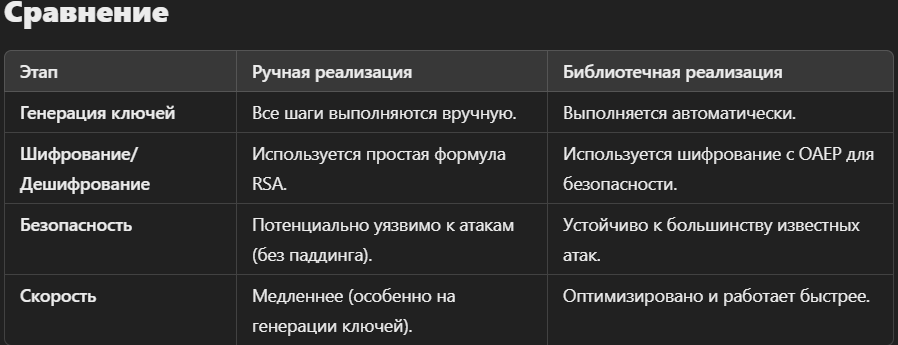